# **Fraud Detection**

## **Data importation**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Fraud_detection.csv')

In [5]:
df.head()

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud
0,DOCTOR,42509,3515418493460774,07/25,251,1
1,DOCTOR,80334,213134223583196,05/32,858,1
2,LAWYER,91552,4869615013764888,03/30,755,1
3,LAWYER,43623,341063356109385,01/29,160,1
4,DOCTOR,22962,4707418777543978402,11/30,102,0


In [6]:
df.shape

(10000, 6)

## **Data cleaning and preparation**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Profession          10000 non-null  object
 1   Income              10000 non-null  int64 
 2   Credit_card_number  10000 non-null  int64 
 3   Expiry              10000 non-null  object
 4   Security_code       10000 non-null  int64 
 5   Fraud               10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 468.9+ KB


In [9]:
df.isnull().sum()

Profession            0
Income                0
Credit_card_number    0
Expiry                0
Security_code         0
Fraud                 0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,Income,Credit_card_number,Security_code,Fraud
count,10000.00000,1.000000e+04,10000.000000,10000.000000
mean,49761.20600,3.851363e+17,863.587800,0.501600
std,28837.72928,1.257950e+18,1484.424959,0.500022
min,1.00000,6.040296e+10,0.000000,0.000000
25%,24863.75000,1.800137e+14,275.000000,0.000000
50%,49483.00000,3.512440e+15,539.500000,1.000000
75%,74483.00000,4.594779e+15,813.250000,1.000000
max,99986.00000,4.999697e+18,9990.000000,1.000000


## **Exploratory Data Analysis(EDA)**

In [15]:
df['Profession'].unique

<bound method Series.unique of 0         DOCTOR
1         DOCTOR
2         LAWYER
3         LAWYER
4         DOCTOR
          ...   
9995      DOCTOR
9996      LAWYER
9997    ENGINEER
9998      DOCTOR
9999      LAWYER
Name: Profession, Length: 10000, dtype: object>

### Determining the number of fraudulent and legitimate transactions to identify if the classes are imbalanced

In [43]:
fraud_counts = df['Fraud'].value_counts()

print("Total Transactions:")
print(f"Fraudulent (1): {fraud_counts.get(1, 0)}")
print(f"Legitimate (0): {fraud_counts.get(0, 0)}")

Total Transactions:
Fraudulent (1): 5016
Legitimate (0): 4984


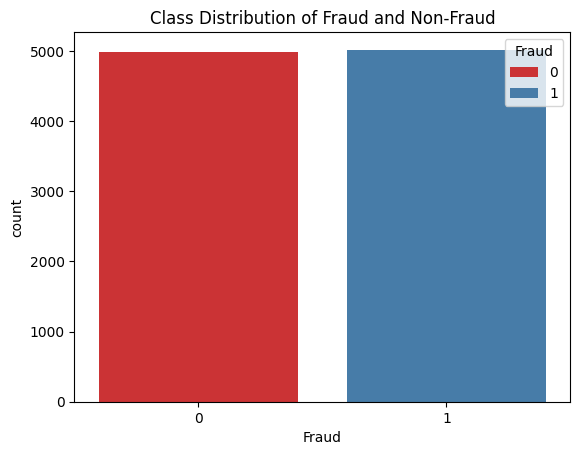

In [62]:
sns.countplot(x='Fraud', data=df, hue='Fraud', palette='Set1')
plt.title("Class Distribution of Fraud and Non-Fraud")
plt.show()

### Determining the number of fraudulent and legitimate transactions by profession

In [64]:
if 'Profession' in df.columns and 'Fraud' in df.columns:
    profession_fraud_counts = df.groupby(['Profession', 'Fraud']).size().unstack(fill_value=0)

    print("Fraudulent and Legitimate Transactions by Profession:")
    print(profession_fraud_counts)
else:
    print("The required columns ('profession' and 'fraud') are not present in the dataset.")

Fraudulent and Legitimate Transactions by Profession:
Fraud          0     1
Profession            
DOCTOR      1620  1759
ENGINEER    1688  1576
LAWYER      1676  1681


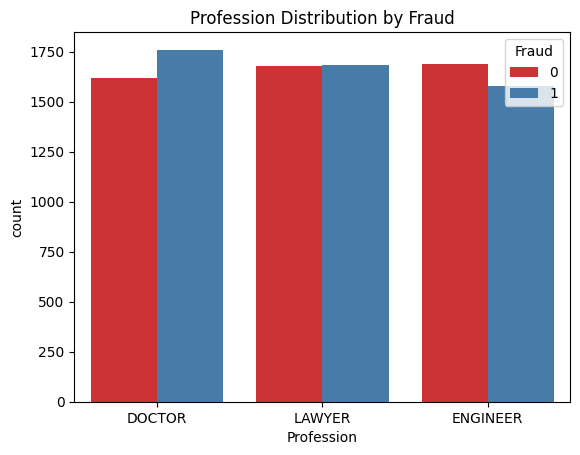

In [54]:
sns.countplot(x='Profession', data=df, hue='Fraud', palette='Set1')
plt.title("Profession Distribution by Fraud")
plt.show()

### Income distribution by fraud status

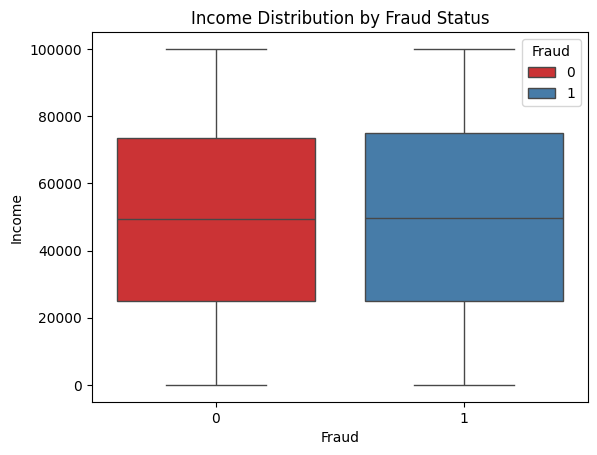

In [71]:
sns.boxplot(x='Fraud', y='Income', data=df, hue='Fraud', palette='Set1')
plt.title("Income Distribution by Fraud Status")
plt.show()

### Income distribution by profession

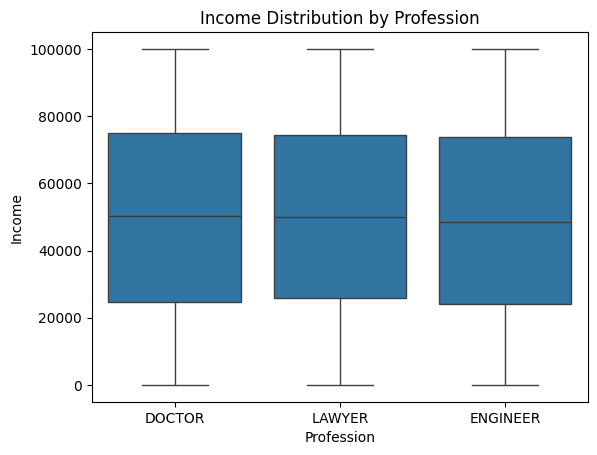

In [91]:
sns.boxplot(x='Profession', y='Income', data=df)
plt.title("Income Distribution by Profession")
plt.show()

### Average fraud rate by profession

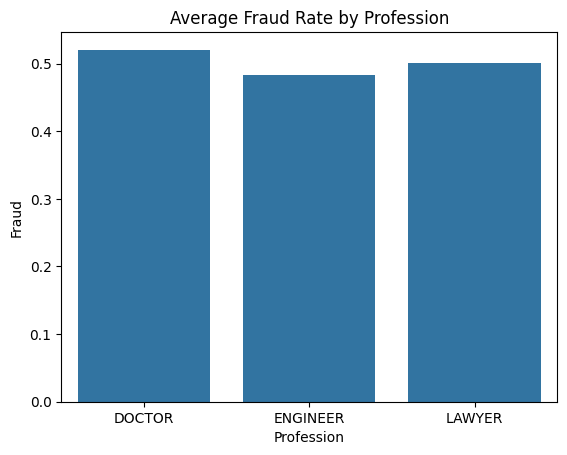

In [87]:
fraud_rate = df.groupby('Profession')['Fraud'].mean().reset_index()
sns.barplot(x='Profession', y='Fraud', data=fraud_rate)
plt.title("Average Fraud Rate by Profession")
plt.show()

### Determining the relationship between income and fraud

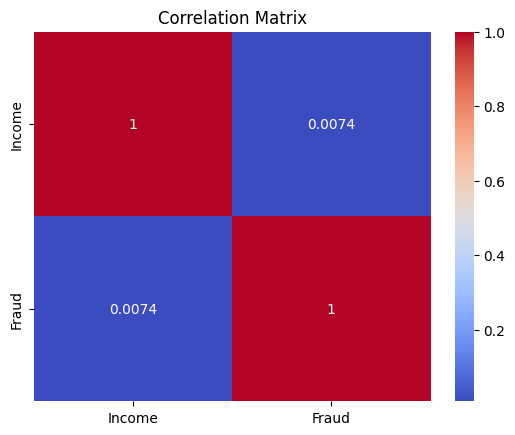

In [93]:
sns.heatmap(df[['Income', 'Fraud']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

###  Determining if certain expiry years are more associated with fraud

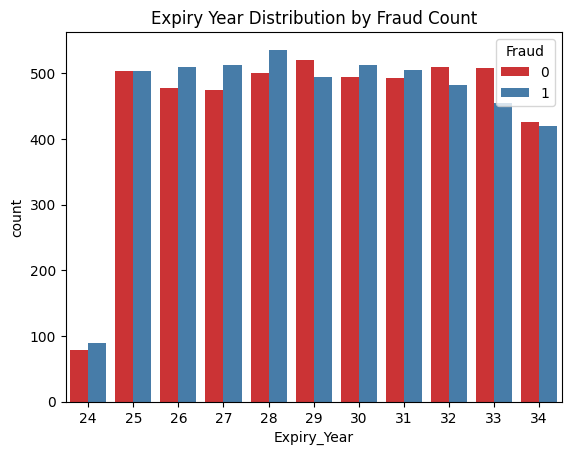

In [101]:
df['Expiry_Year'] = df['Expiry'].apply(lambda x: int(x.split('/')[1]))
sns.countplot(x='Expiry_Year', hue='Fraud', data=df, palette='Set1')
plt.title("Expiry Year Distribution by Fraud Count")
plt.show()

## **Feature engineering**

### Encoding variables

In [109]:
from sklearn.preprocessing import LabelEncoder

df['Profession'] = LabelEncoder().fit_transform(df['Profession'])

In [145]:
df.head()

,Profession,Income,Fraud,Expiry_Year
0,0,42509,1,25
1,0,80334,1,32
2,2,91552,1,30
3,2,43623,1,29
4,0,22962,0,30


### Data splitting into Features(X) and Target(y), and Train and Test split

In [151]:
X = df.drop('Fraud', axis=1)

In [153]:
X

,Profession,Income,Expiry_Year
0,0,42509,25
1,0,80334,32
2,2,91552,30
3,2,43623,29
4,0,22962,30
...,...,...,...
9995,0,2705,27
9996,2,37862,34
9997,1,83152,24
9998,0,90620,33


In [122]:
y=df['Fraud']

In [124]:
y

0       1
1       1
2       1
3       1
4       0
       ..
9995    1
9996    0
9997    1
9998    1
9999    1
Name: Fraud, Length: 10000, dtype: int64

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Model Building**

In [157]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [159]:
y_rf_test_pred=rf.predict(X_test)

## **Model Evaluation**

In [162]:
from sklearn.metrics import confusion_matrix

In [164]:
cm=confusion_matrix(y_test, y_rf_test_pred)

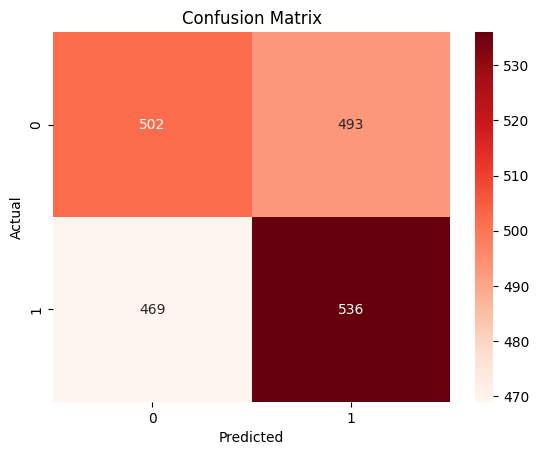

In [197]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [191]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_rf_test_pred)
print (report)

              precision    recall  f1-score   support

           0       0.52      0.50      0.51       995
           1       0.52      0.53      0.53      1005

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.52      0.52      0.52      2000



### Comments

**Precision and Recall for Class 0 and Class 1**: Both classes (0 and 1) have similar precision and recall values (around 0.52 and 0.50-0.53, respectively). This indicates that the model is performing similarly for both classes, though it's not distinguishing well between them.

**F1-Score**: The F1-scores for both classes are also similar, hovering around 0.51-0.53. This suggests that the model is balancing precision and recall moderately well, but the scores indicate room for improvement.

**Accuracy**: The overall accuracy of 52% is low, especially for a binary classification task. It suggests that the model might be only slightly better than random guessing, which is concerning, as it implies the model might not be learning meaningful patterns from the data.

**Macro and Weighted Averages**: Both the macro average and weighted average for precision, recall, and F1-score are all at 0.52, showing consistency across the classes but reinforcing the model’s lack of strong predictive power.

Generally, the model is not performing well, as evidenced by the accuracy being only slightly above chance and the relatively low F1-scores. It suggests that further tuning is needed, possibly by improving data quality.